<a href="https://colab.research.google.com/github/shivakumar0001/AD/blob/main/Email_Marketing_Campaign_Success_Prediction_Business_Objective_and_Dataset_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_name = '/content/Email_Marketing_Campaign_Data (1).csv'

In [4]:


df = pd.read_csv(file_name)
df


,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,1,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,1,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,1,0,1
4,31,5,-1,1601.045636,3.183168,20,51.530231,0,0,0
...,...,...,...,...,...,...,...,...,...,...
100001,60,7,0,491.648352,5.656840,16,34.128312,0,0,1
100002,39,2,1,1756.649457,4.996649,12,75.056579,1,0,0
100003,31,2,0,1408.995621,9.231182,1,96.786007,1,0,0
100004,37,4,1,1274.000000,4.000000,48,57.600000,0,0,1


In [5]:
df.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,1,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,1,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,1,0,1
4,31,5,-1,1601.045636,3.183168,20,51.530231,0,0,0


In [6]:
df.describe()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
count,100006.000000,100006.000000,100006.000000,100006.000000,100006.000000,100006.000000,100006.000000,100006.00000,100006.000000,100006.000000
mean,34.144971,4.154231,1.026968,1488.310525,4.905132,28.509609,69.560398,0.50166,0.500460,0.500180
std,9.953334,2.070700,1.087145,513.755838,2.007800,14.887600,15.642454,0.50000,0.500002,0.500002
min,-1.000000,-1.000000,-1.000000,-13.407589,-1.882086,-3.000000,24.382870,0.00000,0.000000,0.000000
25%,27.000000,3.000000,0.000000,1124.359983,3.584892,18.000000,58.714723,0.00000,0.000000,0.000000
50%,34.000000,4.000000,1.000000,1493.762060,4.987076,28.000000,69.072500,1.00000,1.000000,1.000000
75%,41.000000,6.000000,2.000000,1825.808988,6.294665,38.000000,80.410993,1.00000,1.000000,1.000000
max,75.000000,11.000000,5.000000,3170.173520,11.695316,78.000000,127.654607,1.00000,1.000000,1.000000


In [7]:
df.corr()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
Customer_Age,1.000000,-0.042682,0.015455,-0.008564,-0.031286,-0.006336,-0.035751,0.008266,0.000374,-0.002635
Emails_Opened,-0.042682,1.000000,-0.003900,-0.049494,-0.002431,0.029583,-0.013296,0.003925,-0.002242,0.007844
Emails_Clicked,0.015455,-0.003900,1.000000,0.007288,0.023934,-0.003776,-0.024573,-0.002685,0.002507,0.003937
Purchase_History,-0.008564,-0.049494,0.007288,1.000000,0.024995,0.034611,0.013579,0.001915,0.004403,-0.002459
Time_Spent_On_Website,-0.031286,-0.002431,0.023934,0.024995,1.000000,-0.046828,-0.003565,-0.001164,0.003857,0.002387
Days_Since_Last_Open,-0.006336,0.029583,-0.003776,0.034611,-0.046828,1.000000,0.010476,0.001861,-0.001226,-0.000024
Customer_Engagement_Score,-0.035751,-0.013296,-0.024573,0.013579,-0.003565,0.010476,1.000000,-0.006988,-0.003117,-0.000238
Opened_Previous_Emails,0.008266,0.003925,-0.002685,0.001915,-0.001164,0.001861,-0.006988,1.000000,0.007497,-0.005541
Clicked_Previous_Emails,0.000374,-0.002242,0.002507,0.004403,0.003857,-0.001226,-0.003117,0.007497,1.000000,-0.004460
Device_Type,-0.002635,0.007844,0.003937,-0.002459,0.002387,-0.000024,-0.000238,-0.005541,-0.004460,1.000000


In [8]:
df.shape

(100006, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100006 entries, 0 to 100005
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_Age               100006 non-null  int64  
 1   Emails_Opened              100006 non-null  int64  
 2   Emails_Clicked             100006 non-null  int64  
 3   Purchase_History           100006 non-null  float64
 4   Time_Spent_On_Website      100006 non-null  float64
 5   Days_Since_Last_Open       100006 non-null  int64  
 6   Customer_Engagement_Score  100006 non-null  float64
 7   Opened_Previous_Emails     100006 non-null  int64  
 8   Clicked_Previous_Emails    100006 non-null  int64  
 9   Device_Type                100006 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 7.6 MB


to check null values

In [10]:
df.isnull().sum()

,0
Customer_Age,0
Emails_Opened,0
Emails_Clicked,0
Purchase_History,0
Time_Spent_On_Website,0
Days_Since_Last_Open,0
Customer_Engagement_Score,0
Opened_Previous_Emails,0
Clicked_Previous_Emails,0
Device_Type,0


To check duplicate files

In [11]:


duplicated = df.duplicated().sum()
duplicated

0

In [12]:
np.maximum(df["Emails_Clicked"], 0)

,Emails_Clicked
0,2
1,3
2,1
3,0
4,0
...,...
100001,0
100002,1
100003,0
100004,1


In [13]:
np.maximum (df["Emails_Opened"],0)

,Emails_Opened
0,1
1,3
2,2
3,2
4,5
...,...
100001,7
100002,2
100003,2
100004,4


scatter plot is used for visualize the relationship btw two variables

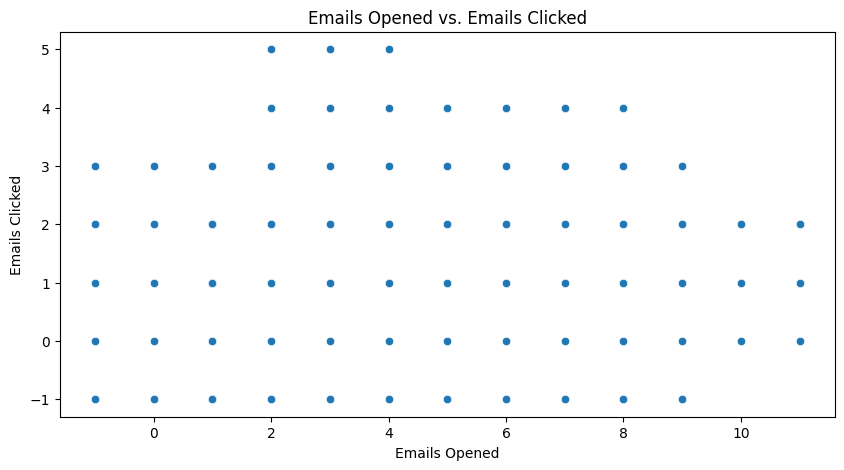

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Emails_Opened'], y=df['Emails_Clicked'])
plt.title('Emails Opened vs. Emails Clicked')
plt.xlabel('Emails Opened')
plt.ylabel('Emails Clicked')
plt.show()

df.hist: it is used for visualizing the data distribution

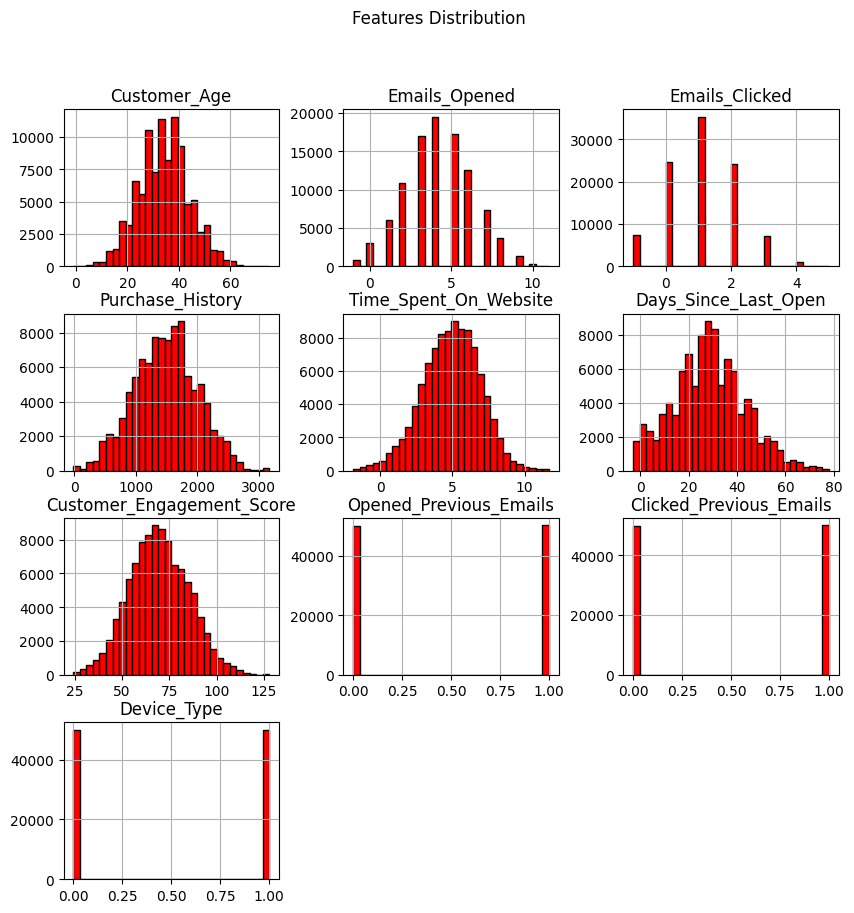

In [15]:
df.hist(figsize=(10,10),bins=30,color="red",edgecolor="black")
plt.suptitle("Features Distribution")
plt.show()


A box plot is a graphical way to show the distribution of numerical data through their quartiles.( values that divide a dataset into four equal parts)

Text(0.5, 0, 'Emails Opened')

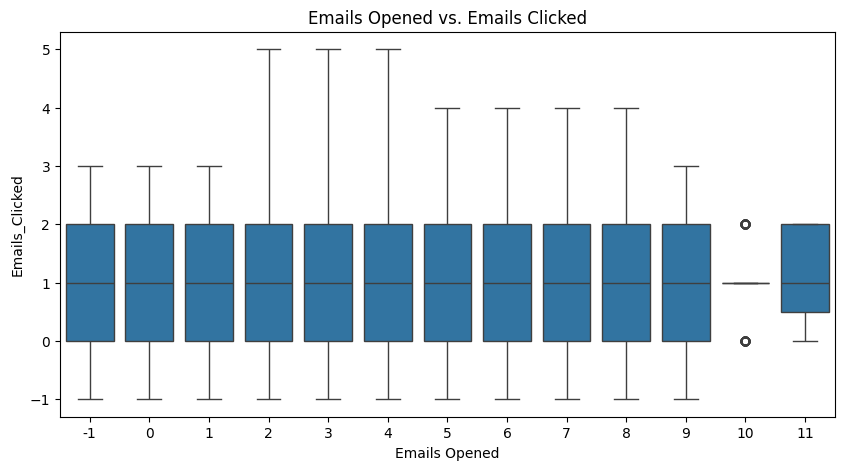

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Emails_Opened'], y=df['Emails_Clicked'])
plt.title('Emails Opened vs. Emails Clicked')
plt.xlabel('Emails Opened')

df.drop is a method used to remove rows or columns from a Pandas DataFrame.

In [16]:
x=df.drop(['Emails_Clicked'],axis=1)
y=df['Emails_Clicked']